# GSE165388
## 05-4_visualization
---
### Before you start
- run codes in `05-3_gw*_annot.Rmd`

In [1]:
import glob
from typing import Dict, List, NamedTuple, Union

import matplotlib.pyplot as plt
import numpy as np
import pyreadr as pr
import pandas as pd
import seaborn as sns

In [2]:
class Config(NamedTuple):
    files: List[str] = glob.glob("../../data/gse165388_annot/*umap.rds")
    labels: List[pd.core.frame.DataFrame] = [
        pd.read_csv(
            v, 
            index_col=0
        ).sort_values("annot") for v in glob.glob("../../data/gse165388_annot/*_clusters.csv")
    ]
    save_dir: str = "../../out/gse165388/05_seurat_annot"
    fig_kwarg: Dict[str, Union[str, int, float]] = {
        'facecolor': 'white',
        'dpi': 300,
        'bbox_inches': 'tight',
        'pad_inches': 0.05
    }
    save_file: bool = False
    
conf = Config(save_file=True)

In [3]:
l_data = [pr.read_r(v)[None] for v in conf.files]
l_id = [v.split("umap")[0].split("/")[-1] for v in conf.files]

In [4]:
l_labels = [[f"{v}: " for v in df.cluster_id] + df.annot for df in conf.labels]

In [5]:
l_center = [df.assign(label=label).groupby("label").median() for df, label in zip(l_data, l_labels)]

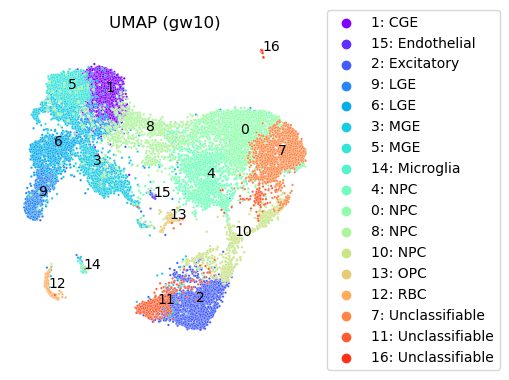

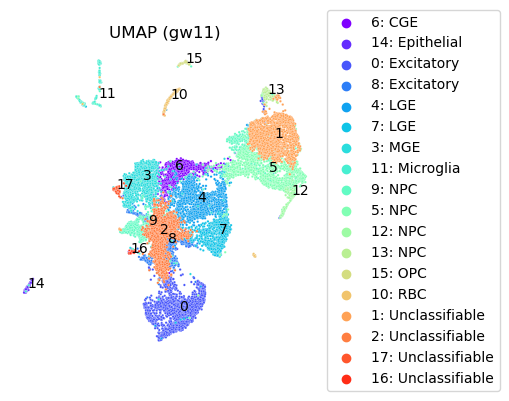

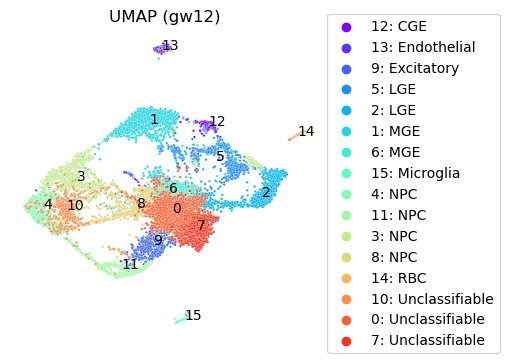

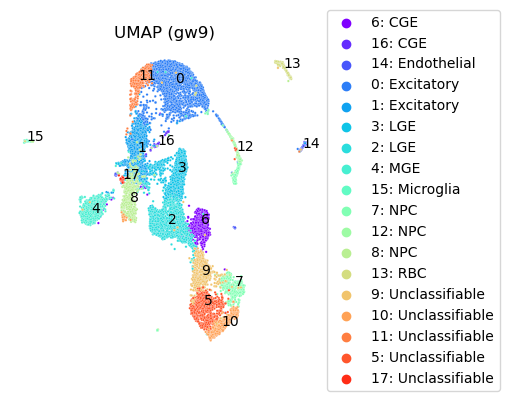

In [6]:
for data, label, center, sample_id in zip(l_data, l_labels, l_center, l_id):

    fig, ax = plt.subplots(figsize=(4, 4))

    sns.scatterplot(
        data=data.loc[label.index, :], x="UMAP_1", y="UMAP_2", hue=label,
        s=3, 
        palette=[plt.cm.rainbow(i/len(label.unique())) for i in range(len(label.unique()))]
    )

    for i, v in enumerate(center.index):
        ax.annotate(v.split(":")[0], center.iloc[i, :], center.iloc[i, :])

    ax.set(title=f"UMAP ({sample_id})")
    ax.legend(bbox_to_anchor=(1, .5), loc="center left");
    ax.axis("off");
    
    if conf.save_file:
        plt.savefig(f"{conf.save_dir}/{sample_id}_umap.png", **conf.fig_kwarg)